# OMIS 116 Final Project: Predicting stock price movements following earnings calls

Ishaan Singh

The motivation for this project was to predict stock price movements within the health care sector following earnings calls due to the impact that these quarterly earnings calls have on market perception and investor sentiment. I selected fourth quarter earnings calls due to the fact that they often consist of annual summaries and forward-looking statements providing a unique insight into the financial health and strategic direction of a company. This project, therefore, aims to use a combination of financial and linguistic information discolsed in the earnings calls to predict susbsequent stock price movements. My goal is to only to have an accurate forecast of subsequent stock price but to also understand what factors influence investor behavior in a critical and volatile sector such as health care.

The structure of the notebook will start with making the dataframe and all the parts of the data preprocessing that happened in that process. From there, I will be testing out various models that will attempt to predict stock price direction after earnings calls.

# Data dictionary

**ticker**: The stock symbol representing the company on the stock exchange.

**transcript**: Full text of the company's earnings call.

**last_earnings_call_date**: The date on which the last earnings call took place.

**cleaned_text**: The earnings call transcript text after cleaning the text

**Stock Open**: The price of the stock at the market open on the day of the earnings call.

**Stock Close**: The price of the stock at the market close on the day of the earnings call.

**Stock Direction**: Indicates whether the stock price went up or down on the day of the earnings call.

**sentiment_polarity**: A numerical score representing the overall sentiment of the earnings call, where positive values indicate positive sentiment and negative values indicate negative sentiment.

**sentiment_subjectivity**: A numerical score representing how subjective the language in the earnings call is, with higher values indicating more subjective language.

**EPS**: Earnings Per Share, a measure of the company's profitability.

**Beat/Loss**: Indicates whether the company's earnings per share (EPS) beat or missed analysts' expectations.

**Percentage Change**: The percentage change in the stock price from the open to close on the day of the earnings call.

**Clinical Trials & Launches**: Reflects the likelihood that the earnings call discussed new clinical trials or product/service launches. This topic is indicative of the company's innovation and future growth potential.

**Financial Performance**: Indicates the probability that the earnings call focused on financial metrics and performance outcomes. This includes discussions on revenue, profits, losses, and overall financial health.

**Clinical Leadership**: The likelihood that the earnings call highlighted the company's leadership in clinical areas or advancements in medical research and development. This reflects the company's competitive position in healthcare innovation.

**Operational Efficiency**: Represents the chance that the call discussed improvements or challenges related to the company's operational processes. This can include manufacturing efficiency, supply chain management, and cost reduction strategies.

**Healthcare Trends**: The probability that the earnings call covered broader healthcare industry trends and their potential impact on the company. This might include regulatory changes, demographic shifts, or emerging health concerns.

# Importing and reading the transcript files

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
shared_drive_path = '/content/drive/Shared drives/OMIS 116 Project Group/Transcripts'
os.chdir(shared_drive_path)

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
folder_path = shared_drive_path
file_list = os.listdir(folder_path)

# Initialize empty lists to store text data and extracted characters
text_data = []
characters_data = []

# Loop through each file and read its content
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    with open(file_path, 'r') as file:
        text = file.read()
        text_data.append(text)

    # Extract characters before the underscore
    characters = file_name.split('_')[0]
    characters_data.append(characters)

# Create a dataframe from the text data and characters
df = pd.DataFrame({'ticker': characters_data, 'transcript': text_data})

# Now an initial df is made with ticker and the raw transcript text

In [ ]:
df

,ticker,transcript
0,JNJ,"Operator\n\nGood morning, and welcome to Johns..."
1,LLY,"Operator\n\nLadies and gentlemen, thank you fo..."
2,PFE,"Operator\n\nGood day, everyone, and welcome to..."
3,TMO,"﻿Operator\nGood morning, ladies and gentlemen,..."
4,ABT,"﻿Operator\nGood morning, and thank you for sta..."
5,UNH,﻿Operator\nGood morning and welcome to the Uni...
6,SNY,"﻿Eva Schaefer-Jansen\nGood morning, good after..."
7,MDT,﻿Ryan Weispfenning\nGood morning. I am Ryan We...
8,AZN,"﻿Andy Barnett\nWell, a warm welcome everybody ..."
9,GILD,﻿Operator\nGood afternoon. Thank you for atten...


In [ ]:
import yfinance as yf
import pandas as pd

earnings_dates = []
for ticker_symbol in df['ticker']:
    try:
        stock = yf.Ticker(ticker_symbol)
        # Assuming get_earnings_dates() is a method that exists and returns a DataFrame with the desired data
        ES = stock.get_earnings_dates()
        if not ES.empty and 'Reported EPS' in ES.columns:
            index = ES['Reported EPS'].notna().idxmax()
            date = index.strftime('%Y-%m-%d')
            earnings_dates.append(date)
        else:
            # Append a placeholder if no earnings date is available
            earnings_dates.append('No data')
    except Exception as e:
        print(f"Error processing {ticker_symbol}: {e}")
        earnings_dates.append('Error')

df['last_earnings_call_date'] = earnings_dates


In [ ]:
#Getting the dates on which the earnings call happened and making a new column
earnings_dates = []
for ticker_symbol in df['ticker']:
  stock = yf.Ticker(ticker_symbol)
  ES = stock.get_earnings_dates()

  earnings_dates.append(date)

df['last_earnings_call_date'] = earnings_dates

In [ ]:
#Verifying that yfinance is retrieving correct earnings date
import yfinance as yf
stock = yf.Ticker("JNJ")
ES = stock.get_earnings_dates()
index = ES['Reported EPS'].notna().idxmax()
date = index.strftime('%Y-%m-%d')
date

'2024-01-23'

In [ ]:
#Now earnings dates are added to dataframe from before
df

,ticker,transcript,last_earnings_call_date
0,JNJ,"Operator\n\nGood morning, and welcome to Johns...",2024-01-23
1,LLY,"Operator\n\nLadies and gentlemen, thank you fo...",2024-02-06
2,PFE,"Operator\n\nGood day, everyone, and welcome to...",2024-01-30
3,TMO,"﻿Operator\nGood morning, ladies and gentlemen,...",2024-01-31
4,ABT,"﻿Operator\nGood morning, and thank you for sta...",2024-01-24
5,UNH,﻿Operator\nGood morning and welcome to the Uni...,2024-01-12
6,SNY,"﻿Eva Schaefer-Jansen\nGood morning, good after...",2024-02-01
7,MDT,﻿Ryan Weispfenning\nGood morning. I am Ryan We...,2024-02-20
8,AZN,"﻿Andy Barnett\nWell, a warm welcome everybody ...",2024-02-08
9,GILD,﻿Operator\nGood afternoon. Thank you for atten...,2024-02-06


# Processing of transcript text data

We used spaCY to preprocess the transcript text data in which we removed stop words, lemmatized words, and converted all text to lowercase ensuring a consistent format.

In [ ]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

punctuations = string.punctuation

nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

parser = English()

def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)

    # Lemmatizing & lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    return ' '.join(mytokens)
df['cleaned_text'] = df['transcript'].apply(spacy_tokenizer)

In [ ]:
#cleaned_text now contains all transcript text that has been processed
df

,ticker,transcript,last_earnings_call_date,cleaned_text
0,JNJ,"Operator\n\nGood morning, and welcome to Johns...",2024-01-23,operator good morning welcome johnson johnson ...
1,LLY,"Operator\n\nLadies and gentlemen, thank you fo...",2024-02-06,operator ladies gentleman thank stand welcome ...
2,PFE,"Operator\n\nGood day, everyone, and welcome to...",2024-01-30,operator good day welcome pfizer fourth quarte...
3,TMO,"﻿Operator\nGood morning, ladies and gentlemen,...",2024-01-31,﻿operator good morning lady gentleman welcome ...
4,ABT,"﻿Operator\nGood morning, and thank you for sta...",2024-01-24,﻿operator good morning thank stand welcome abb...
5,UNH,﻿Operator\nGood morning and welcome to the Uni...,2024-01-12,﻿operator good morning welcome unitedhealth gr...
6,SNY,"﻿Eva Schaefer-Jansen\nGood morning, good after...",2024-02-01,﻿eva schaefer jansen good morning good afterno...
7,MDT,﻿Ryan Weispfenning\nGood morning. I am Ryan We...,2024-02-20,﻿ryan weispfenning good morning ryan weispfenn...
8,AZN,"﻿Andy Barnett\nWell, a warm welcome everybody ...",2024-02-08,﻿andy barnett warm welcome everybody astrazene...
9,GILD,﻿Operator\nGood afternoon. Thank you for atten...,2024-02-06,﻿operator good afternoon thank attend fourth q...


In [ ]:
#Getting all the stock prices at open/close for day of earnings calls
#From there, we can determine whether stock went up or down following earnings calls
tickers = df['ticker'].tolist()
dates = df['last_earnings_call_date'].tolist()
df_stock = pd.DataFrame(columns=["Ticker", "Stock Open", "Stock Close", "Stock Direction"])
openprices=[]
closeprices=[]
for ticker, date in zip(tickers, dates):
  start_date = pd.to_datetime(date)
  start_date = start_date.strftime('%Y-%m-%d')
  end_date = pd.to_datetime(date) + pd.Timedelta(days=1)
  end_date = end_date.strftime('%Y-%m-%d')
  data = yf.download(ticker, start=start_date, end=end_date)
  if not data.empty:
        # Calculate whether the stock went up or down on the earnings call day
        stock_direction = (data.iloc[-1]['Close'] - data.iloc[0]['Open']) > 0
        new_row = {
            "Ticker": ticker,
            "Stock Open": data.iloc[0]['Open'],
            "Stock Close": data.iloc[-1]['Close'],
            "Stock Direction": int(stock_direction)
        }
        # Use concat instead of append
        df_stock = pd.concat([df_stock, pd.DataFrame([new_row])], ignore_index=True)
  else:
        print(f"No data available for {ticker} for the earnings call date.")

[*********************100%%**********************]  1 of 1 completed
<ipython-input-57-cd5eec644305>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_stock = pd.concat([df_stock, pd.DataFrame([new_row])], ignore_index=True)
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%************

No data available for MRK for the earnings call date.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
2024-03-19 21:59:16,158 yfinance     ERROR    
1 Failed download:
ERROR:yfinance:['BMY']: Exception("%ticker%: Data doesn't exist for startDate = 1761883200, endDate = 1761969600")
2024-03-19 21:59:16,161 yfinance     ERROR    ['BMY']: Exception("%ticker%: Data doesn't exist for startDate = 1761883200, endDate = 1761969600")
[*********************100%%**********************]  1 of 1 completed
[****************

No data available for BMY for the earnings call date.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
#Checking if stock direction is correct
df_stock

,Ticker,Stock Open,Stock Close,Stock Direction
0,JNJ,159.660004,159.809998,1
1,LLY,742.000000,705.030029,0
2,PFE,27.889999,27.020000,0
3,TMO,563.299988,538.979980,0
4,ABT,110.750000,110.769997,1
5,UNH,518.859985,521.510010,1
6,SNY,48.520000,48.410000,0
7,MDT,86.959999,85.849998,0
8,AZN,62.020000,63.520000,1
9,GILD,76.870003,77.720001,1


In [ ]:
#Creating df to merge the stock price data with the previous dataframe
df = df.merge(df_stock, left_on='ticker', right_on = 'Ticker')
df = df.drop(['Ticker'], axis=1)

In [ ]:
df

,ticker,transcript,last_earnings_call_date,cleaned_text,Stock Open,Stock Close,Stock Direction
0,JNJ,"Operator\n\nGood morning, and welcome to Johns...",2024-01-23,operator good morning welcome johnson johnson ...,159.660004,159.809998,1
1,LLY,"Operator\n\nLadies and gentlemen, thank you fo...",2024-02-06,operator ladies gentleman thank stand welcome ...,742.000000,705.030029,0
2,PFE,"Operator\n\nGood day, everyone, and welcome to...",2024-01-30,operator good day welcome pfizer fourth quarte...,27.889999,27.020000,0
3,TMO,"﻿Operator\nGood morning, ladies and gentlemen,...",2024-01-31,﻿operator good morning lady gentleman welcome ...,563.299988,538.979980,0
4,ABT,"﻿Operator\nGood morning, and thank you for sta...",2024-01-24,﻿operator good morning thank stand welcome abb...,110.750000,110.769997,1
5,UNH,﻿Operator\nGood morning and welcome to the Uni...,2024-01-12,﻿operator good morning welcome unitedhealth gr...,518.859985,521.510010,1
6,SNY,"﻿Eva Schaefer-Jansen\nGood morning, good after...",2024-02-01,﻿eva schaefer jansen good morning good afterno...,48.520000,48.410000,0
7,MDT,﻿Ryan Weispfenning\nGood morning. I am Ryan We...,2024-02-20,﻿ryan weispfenning good morning ryan weispfenn...,86.959999,85.849998,0
8,AZN,"﻿Andy Barnett\nWell, a warm welcome everybody ...",2024-02-08,﻿andy barnett warm welcome everybody astrazene...,62.020000,63.520000,1
9,GILD,﻿Operator\nGood afternoon. Thank you for atten...,2024-02-06,﻿operator good afternoon thank attend fourth q...,76.870003,77.720001,1


In [ ]:
#Creating term-dcoument matrix using the processed transcript text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 0.1, max_df = 0.9)
corpus = df['cleaned_text'].values.astype('U')
X = vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
direction = df['Stock Direction'].tolist()

In [ ]:
#Viewing term-document matrix
tfidf_df['Label'] = direction
tfidf_df

,000,02,03,04,05,07,100,10th,11,110,...,yeah,yee,yep,yes,yesterday,yield,young,zero,zone,Label
0,0.026503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026503,0.000000,...,0.025798,0.000000,0.000000,0.016106,0.000000,0.000000,0.000000,0.026330,0.000000,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003786,0.000000,0.015980,0.006896,...,0.062220,0.000000,0.000000,0.006474,0.033553,0.000000,0.006896,0.000000,0.000000,0
2,0.012237,0.000000,0.000000,0.000000,0.012158,0.000000,0.005799,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.089237,0.000000,0.026244,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0.000000,0.000000,0.027115,0.000000,0.025866,0.000000,0.006823,0.000000,...,0.013283,0.000000,0.000000,0.044228,0.000000,0.000000,0.011778,0.013557,0.000000,0
4,0.016922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033844,0.000000,...,0.082361,0.000000,0.000000,0.006856,0.000000,0.000000,0.000000,0.000000,0.000000,1
5,0.086062,0.000000,0.000000,0.000000,0.000000,0.000000,0.030587,0.000000,0.000000,0.000000,...,0.083773,0.000000,0.000000,0.008717,0.000000,0.000000,0.000000,0.000000,0.045176,1
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004925,0.000000,0.000000,0.000000,...,0.040469,0.000000,0.023209,0.021054,0.000000,0.007430,0.000000,0.000000,0.000000,0
7,0.004398,0.000000,0.000000,0.000000,0.000000,0.000000,0.008336,0.000000,0.008796,0.007592,...,0.136992,0.000000,0.000000,0.021381,0.000000,0.006288,0.000000,0.000000,0.000000,0
8,0.022922,0.000000,0.020474,0.030711,0.000000,0.010237,0.008690,0.010237,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.040861,0.000000,0.000000,0.007914,0.018219,0.000000,1
9,0.012932,0.086631,0.115508,0.043315,0.000000,0.000000,0.006128,0.000000,0.032330,0.000000,...,0.018882,0.028877,0.000000,0.015717,0.013577,0.000000,0.000000,0.000000,0.000000,1


In [ ]:
#Converting stock direction from categorical to numerical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Create an instance of LabelEncoder and encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_stock['Stock Direction'])

# Use the encoded labels for splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

print(y_train[:5])  # Print the first 5 to check
print(y_train.dtype)

[1 1 0 1 1]
int64


In [ ]:
#Using TextBlob library for sentiment analysis in which polarity and subjectivity will be used as features
from textblob import TextBlob

# Calculate sentiment polarity as a new feature
df['sentiment_polarity'] = df['transcript'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate sentiment subjectivity as a new feature
df['sentiment_subjectivity'] = df['transcript'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
df

,ticker,transcript,last_earnings_call_date,cleaned_text,Stock Open,Stock Close,Stock Direction,sentiment_polarity,sentiment_subjectivity
0,JNJ,"Operator\n\nGood morning, and welcome to Johns...",2024-01-23,operator good morning welcome johnson johnson ...,159.660004,159.809998,1,0.149611,0.420494
1,LLY,"Operator\n\nLadies and gentlemen, thank you fo...",2024-02-06,operator ladies gentleman thank stand welcome ...,742.000000,705.030029,0,0.135140,0.423058
2,PFE,"Operator\n\nGood day, everyone, and welcome to...",2024-01-30,operator good day welcome pfizer fourth quarte...,27.889999,27.020000,0,0.131632,0.415986
3,TMO,"﻿Operator\nGood morning, ladies and gentlemen,...",2024-01-31,﻿operator good morning lady gentleman welcome ...,563.299988,538.979980,0,0.195097,0.447058
4,ABT,"﻿Operator\nGood morning, and thank you for sta...",2024-01-24,﻿operator good morning thank stand welcome abb...,110.750000,110.769997,1,0.199938,0.448189
5,UNH,﻿Operator\nGood morning and welcome to the Uni...,2024-01-12,﻿operator good morning welcome unitedhealth gr...,518.859985,521.510010,1,0.201628,0.449266
6,SNY,"﻿Eva Schaefer-Jansen\nGood morning, good after...",2024-02-01,﻿eva schaefer jansen good morning good afterno...,48.520000,48.410000,0,0.163339,0.448658
7,MDT,﻿Ryan Weispfenning\nGood morning. I am Ryan We...,2024-02-20,﻿ryan weispfenning good morning ryan weispfenn...,86.959999,85.849998,0,0.179528,0.409195
8,AZN,"﻿Andy Barnett\nWell, a warm welcome everybody ...",2024-02-08,﻿andy barnett warm welcome everybody astrazene...,62.020000,63.520000,1,0.152192,0.451074
9,GILD,﻿Operator\nGood afternoon. Thank you for atten...,2024-02-06,﻿operator good afternoon thank attend fourth q...,76.870003,77.720001,1,0.109832,0.406212


In [ ]:
#LDA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Step 1: Convert the text documents into a matrix of token counts
vectorizer = CountVectorizer(min_df=0.1, max_df=0.9)
corpus = df['cleaned_text'].values.astype('U')
X = vectorizer.fit_transform(corpus)

# Step 2: Apply LDA
n_topics = 5  # Specify the number of topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# To display the topics with their terms
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 15
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
trend margin 2025 pricing utilization certainly industry inpatient claim yes assumption feel assume value datum
Topic 1:
patient phase datum study disease launch trial therapy president officer chief potential medicine executive course
Topic 2:
margin launch patient yes digit customer q4 china single portfolio adjust core chief officer gross
Topic 3:
officer chief health medicare care executive service analyst margin 24 value adjust member president trend
Topic 4:
procedure chief officer analyst system executive yeah president chairman launch margin patient geoff vice surgery


Topic 0 - Healthcare trends:
This topic delves into future expectations, with keywords like "trend," "margin," and "2025" highlighting discussions about long-term market trends and financial forecasts. Words like "pricing," "utilization," and "industry" suggest a focus on how the company plans to navigate market changes and assumptions about future profitability ("value"). The presence of these discussions in earnings calls can signal to investors the company's strategic planning and outlook, potentially affecting stock price movements based on optimism or skepticism regarding these projections.

Topic 1 - Clinical Trials and Product Launches:
Centered on the crucial phases of bringing new treatments to market, this topic includes terms like "patient," "phase," "study," and "trial," pointing to the detailed processes involved in clinical trials. The inclusion of "launch" and "therapy" indicates discussions on the transition from successful trials to market entry, which are pivotal moments for healthcare companies. Positive developments or successful launches highlighted through these keywords can lead to a bullish investor sentiment, driving stock prices up as they reflect significant advancements towards revenue generation.

Topic 2 - Financial health:
This topic focuses on immediate financial health and expansion strategies, with "margin," "launch," "customer," and "Q4" indicating quarterly sales performance and product launches. The reference to "China" and "portfolio" suggests geographic expansion and diversification efforts. Discussions encapsulated by these keywords are directly linked to operational success and market penetration, which are critical drivers of stock price increases when outcomes are favorable.

Topic 3 - Clinical leadership:
With keywords like "health," "medicare," "care," and "service," this topic addresses the company's strategy in healthcare services, particularly with Medicare. "Executive" and "analyst" hint at high-level insights and analysis regarding the healthcare services market. Positive strategies or successful adjustments in this area, particularly involving Medicare, can positively influence stock prices due to the stability and growth potential in healthcare services.

Topic 4 - Operational Efficiency:
Keywords such as "procedure," "system," "executive," and "efficiency" shine a light on the company's focus on streamlining operations and the strategic direction provided by its leadership ("president," "chairman"). The mention of specific operational aspects like "surgery" and general efficiency improvements signals to investors the company's commitment to operational excellence and strategic leadership. Improved efficiencies and strong executive guidance are favorable indicators for investors, potentially leading to stock price appreciation.

In [ ]:
doc_topic_dist = lda.transform(X)

# Convert to DataFrame for easier handling
doc_topic_dist_df = pd.DataFrame(doc_topic_dist, columns=[f'Topic_{i}' for i in range(n_topics)])

In [ ]:
df = pd.concat([df, doc_topic_dist_df], axis=1)

In [ ]:
# Adjusted mapping of old column names to new, shorter topic names based on recent interpretations
column_mapping = {
    'Topic_0': 'Healthcare Trends',
    'Topic_1': 'Clinical Trials & Launches',
    'Topic_2': 'Financial Performance',
    'Topic_3': 'Clinical Leadership',
    'Topic_4': 'Operational Efficiency'
}
# Rename the columns in df_final based on the updated mapping
df.rename(columns=column_mapping, inplace=True)

In [ ]:
df

,ticker,transcript,last_earnings_call_date,cleaned_text,Stock Open,Stock Close,Stock Direction,sentiment_polarity,sentiment_subjectivity,EPS,Beat/Loss,Percentage Change,Clinical Trials & Launches,Financial Performance,Clinical Leadership,Operational Efficiency,Healthcare Trends
0,JNJ,"Operator\n\nGood morning, and welcome to Johns...",2024-01-23,operator good morning welcome johnson johnson ...,159.660004,159.809998,1.0,0.149611,0.420494,2.29,0.01,0.0009,0.000072,0.000071,0.000072,0.983701,0.016084
1,LLY,"Operator\n\nLadies and gentlemen, thank you fo...",2024-02-06,operator ladies gentleman thank stand welcome ...,742.000000,705.030029,0.0,0.135140,0.423058,2.49,0.12,-0.0498,0.000051,0.000051,0.000051,0.913680,0.086167
2,PFE,"Operator\n\nGood day, everyone, and welcome to...",2024-01-30,operator good day welcome pfizer fourth quarte...,27.889999,27.020000,0.0,0.131632,0.415986,0.10,0.28,-0.0312,0.033831,0.000061,0.000061,0.399767,0.566280
3,TMO,"﻿Operator\nGood morning, ladies and gentlemen,...",2024-01-31,﻿operator good morning lady gentleman welcome ...,563.299988,538.979980,0.0,0.195097,0.447058,5.67,0.02,-0.0432,0.448569,0.199438,0.019492,0.318601,0.013901
4,ABT,"﻿Operator\nGood morning, and thank you for sta...",2024-01-24,﻿operator good morning thank stand welcome abb...,110.750000,110.769997,1.0,0.199938,0.448189,1.19,1.19,0.0002,0.213210,0.137292,0.061907,0.466551,0.121040
5,UNH,﻿Operator\nGood morning and welcome to the Uni...,2024-01-12,﻿operator good morning welcome unitedhealth gr...,518.859985,521.510010,1.0,0.201628,0.449266,6.16,0.17,0.0051,0.999713,0.000071,0.000072,0.000072,0.000072
6,SNY,"﻿Eva Schaefer-Jansen\nGood morning, good after...",2024-02-01,﻿eva schaefer jansen good morning good afterno...,48.520000,48.410000,0.0,0.163339,0.448658,0.90,0.01,-0.0023,0.000071,0.000068,0.000067,0.592164,0.407630
7,MDT,﻿Ryan Weispfenning\nGood morning. I am Ryan We...,2024-02-20,﻿ryan weispfenning good morning ryan weispfenn...,86.959999,85.849998,0.0,0.179528,0.409195,1.30,0.04,-0.0128,0.000063,0.061110,0.047810,0.890954,0.000063
8,AZN,"﻿Andy Barnett\nWell, a warm welcome everybody ...",2024-02-08,﻿andy barnett warm welcome everybody astrazene...,62.020000,63.520000,1.0,0.152192,0.451074,0.73,-0.04,0.0242,0.000048,0.000048,0.000048,0.304701,0.695155
9,GILD,﻿Operator\nGood afternoon. Thank you for atten...,2024-02-06,﻿operator good afternoon thank attend fourth q...,76.870003,77.720001,1.0,0.109832,0.406212,1.72,-0.04,0.0111,0.001906,0.000071,0.000071,0.409687,0.588265


In [ ]:
import pandas as pd

# Create 'Stock Direction' column based on the comparison of 'Stock Open' and 'Stock Close'
df['Stock Direction'] = df.apply(lambda row: 'Up' if row['Stock Close'] > row['Stock Open']
                                 else ('Down' if row['Stock Close'] < row['Stock Open'] else 'Unchanged'), axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert 'Stock Direction' into numeric values (Label Encoding)
label_encoder = LabelEncoder()
df['Stock Direction'] = label_encoder.fit_transform(df['Stock Direction'])

# Define features and target variable
X = df[['sentiment_polarity', 'sentiment_subjectivity','cleaned_text']]
y = df['Stock Direction']

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Define preprocessing for numerical columns (impute missing values)
numeric_features = ['sentiment_polarity', 'sentiment_subjectivity']
numeric_transformer = SimpleImputer(strategy='mean')

# Define preprocessing for categorical features (encode categories)
categorical_features = ['categories_discussed']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define preprocessing for text feature
text_features = 'cleaned_text'
text_transformer = TfidfVectorizer(stop_words='english')

# Create the preprocessing and modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_features)
    ])

# Append classifier to preprocessing pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])


In [ ]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['sentiment_polarity',
                                                   'sentiment_subjectivity']),
                                                 ('text',
                                                  TfidfVectorizer(stop_words='english'),
                                                  'cleaned_text')])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
# Predict the stock direction on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.4f}')


Model Accuracy: 0.4167


In [ ]:
df

,ticker,transcript,last_earnings_call_date,cleaned_text,Stock Open,Stock Close,Stock Direction,sentiment_polarity,sentiment_subjectivity
0,JNJ,"Operator\n\nGood morning, and welcome to Johns...",2024-01-23,operator good morning welcome johnson johnson ...,159.660004,159.809998,1,0.149611,0.420494
1,LLY,"Operator\n\nLadies and gentlemen, thank you fo...",2024-02-06,operator ladies gentleman thank stand welcome ...,742.000000,705.030029,0,0.135140,0.423058
2,PFE,"Operator\n\nGood day, everyone, and welcome to...",2024-01-30,operator good day welcome pfizer fourth quarte...,27.889999,27.020000,0,0.131632,0.415986
3,TMO,"﻿Operator\nGood morning, ladies and gentlemen,...",2024-01-31,﻿operator good morning lady gentleman welcome ...,563.299988,538.979980,0,0.195097,0.447058
4,ABT,"﻿Operator\nGood morning, and thank you for sta...",2024-01-24,﻿operator good morning thank stand welcome abb...,110.750000,110.769997,1,0.199938,0.448189
5,UNH,﻿Operator\nGood morning and welcome to the Uni...,2024-01-12,﻿operator good morning welcome unitedhealth gr...,518.859985,521.510010,1,0.201628,0.449266
6,SNY,"﻿Eva Schaefer-Jansen\nGood morning, good after...",2024-02-01,﻿eva schaefer jansen good morning good afterno...,48.520000,48.410000,0,0.163339,0.448658
7,MDT,﻿Ryan Weispfenning\nGood morning. I am Ryan We...,2024-02-20,﻿ryan weispfenning good morning ryan weispfenn...,86.959999,85.849998,0,0.179528,0.409195
8,AZN,"﻿Andy Barnett\nWell, a warm welcome everybody ...",2024-02-08,﻿andy barnett warm welcome everybody astrazene...,62.020000,63.520000,1,0.152192,0.451074
9,GILD,﻿Operator\nGood afternoon. Thank you for atten...,2024-02-06,﻿operator good afternoon thank attend fourth q...,76.870003,77.720001,1,0.109832,0.406212


Reading in file 'epsbeats.csv' which contains information regarding how much a company beat or missed analysts' expectation by

In [ ]:
shared_drive_path = '/content/drive/Shared drives/OMIS 116 Project Group'

# File path of epsbeats.csv
file_path = os.path.join(shared_drive_path, 'epsbeats.csv')

# Read epsbeats.csv into a DataFrame
df_epsbeats = pd.read_csv(file_path)
df_epsbeats
# Capitalize all ticker letters
df_epsbeats['Ticker2'] = df_epsbeats['Ticker2'].str.upper()

# Display the updated DataFrame
df_epsbeats
df = pd.concat([df, df_epsbeats], axis=1)
df.drop('Ticker2', axis=1, inplace=True)
# Rename columns
df.rename(columns={'eps': 'EPS', 'beat/loss': 'Beat/Loss'}, inplace=True)


Adding a 'Percentage Change' column for interpretability

In [ ]:
#Percentage Change
df['Percentage Change'] = ((df['Stock Close'] - df['Stock Open']) / df['Stock Open']) * 100
df['Percentage Change'] = df['Percentage Change'].round(2).astype(float)/100
# Print the DataFrame with the added column
df

,ticker,transcript,last_earnings_call_date,cleaned_text,Stock Open,Stock Close,Stock Direction,sentiment_polarity,sentiment_subjectivity,EPS,Beat/Loss,Percentage Change
0,JNJ,"Operator\n\nGood morning, and welcome to Johns...",2024-01-23,operator good morning welcome johnson johnson ...,159.660004,159.809998,1.0,0.149611,0.420494,2.29,0.01,0.0009
1,LLY,"Operator\n\nLadies and gentlemen, thank you fo...",2024-02-06,operator ladies gentleman thank stand welcome ...,742.000000,705.030029,0.0,0.135140,0.423058,2.49,0.12,-0.0498
2,PFE,"Operator\n\nGood day, everyone, and welcome to...",2024-01-30,operator good day welcome pfizer fourth quarte...,27.889999,27.020000,0.0,0.131632,0.415986,0.10,0.28,-0.0312
3,TMO,"﻿Operator\nGood morning, ladies and gentlemen,...",2024-01-31,﻿operator good morning lady gentleman welcome ...,563.299988,538.979980,0.0,0.195097,0.447058,5.67,0.02,-0.0432
4,ABT,"﻿Operator\nGood morning, and thank you for sta...",2024-01-24,﻿operator good morning thank stand welcome abb...,110.750000,110.769997,1.0,0.199938,0.448189,1.19,1.19,0.0002
5,UNH,﻿Operator\nGood morning and welcome to the Uni...,2024-01-12,﻿operator good morning welcome unitedhealth gr...,518.859985,521.510010,1.0,0.201628,0.449266,6.16,0.17,0.0051
6,SNY,"﻿Eva Schaefer-Jansen\nGood morning, good after...",2024-02-01,﻿eva schaefer jansen good morning good afterno...,48.520000,48.410000,0.0,0.163339,0.448658,0.90,0.01,-0.0023
7,MDT,﻿Ryan Weispfenning\nGood morning. I am Ryan We...,2024-02-20,﻿ryan weispfenning good morning ryan weispfenn...,86.959999,85.849998,0.0,0.179528,0.409195,1.30,0.04,-0.0128
8,AZN,"﻿Andy Barnett\nWell, a warm welcome everybody ...",2024-02-08,﻿andy barnett warm welcome everybody astrazene...,62.020000,63.520000,1.0,0.152192,0.451074,0.73,-0.04,0.0242
9,GILD,﻿Operator\nGood afternoon. Thank you for atten...,2024-02-06,﻿operator good afternoon thank attend fourth q...,76.870003,77.720001,1.0,0.109832,0.406212,1.72,-0.04,0.0111


# Logistic Regression model

In [ ]:
# Feature selection
features = ['sentiment_polarity', 'sentiment_subjectivity', 'EPS', 'Beat/Loss',
            'Clinical Trials & Launches', 'Financial Performance', 'Clinical Leadership', 'Operational Efficiency', 'Healthcare Trends']
X = df[features]
y = df['Stock Direction']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.62


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler

# Update your pipeline if needed, e.g., adding a scaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('feature_selection', SelectKBest(f_classif)),
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

# Consider expanding your parameter grid
param_grid = {
    'feature_selection__k': [3, 5, 7, 9, 'all'],  # Adjust 'all' or max features accordingly
    'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logistic_regression__solver': ['liblinear', 'lbfgs']
}

# Use a stratified K-fold to ensure balanced split in each fold
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Choose a scoring function that reflects your objective
f1_scorer = make_scorer(f1_score, pos_label='Up')

# Adjust GridSearchCV to consider multiple scoring metrics
grid_search = GridSearchCV(pipeline, param_grid, cv=cv_strategy, scoring=f1_scorer, refit='AUC')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])
print(f'ROC-AUC Score: {roc_auc:.2f}')

Best parameters: {'feature_selection__k': 5, 'logistic_regression__C': 1, 'logistic_regression__solver': 'liblinear'}
Accuracy: 0.50
ROC-AUC Score: 0.62


In [ ]:
select_k_best = best_model.named_steps['feature_selection']
selected_features_bool = select_k_best.get_support()
selected_features = [feature for feature, selected in zip(features, selected_features_bool) if selected]
print("Selected features:", selected_features)

Selected features: ['EPS', 'Clinical Trials & Launches', 'Financial Performance', 'Clinical Leadership', 'Operational Efficiency']


In [ ]:
def display_top_words(model, feature_names, no_top_words, selected_topics):
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx in selected_topics:
            print(f"Topic {topic_idx}:")
            print(" ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Extract feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

selected_topics = [int(name.split('_')[1]) for name in selected_feature_names if name.startswith('Topic')]

# Display the top words for each selected topic
display_top_words(lda, feature_names, 10, selected_topics)

# Summary of model results:

The logistic regression model, with the best parameters {'feature_selection__k': 5, 'logistic_regression__C': 1, 'logistic_regression__solver': 'liblinear'}, achieved an accuracy of 50% and a ROC-AUC score of 0.62. It was trained on selected features: ['EPS', 'Clinical Trials & Launches', 'Financial Performance', 'Clinical Leadership', 'Operational Efficiency']. This indicates moderate performance in predicting stock price direction, correctly classifying half of the instances, with a fair discriminatory power according to the ROC-AUC score.

# Random Forest Model

First, we will try with the term-document matrix combined with other numeric features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

combined_features_df = pd.concat([tfidf_df, df['sentiment_polarity'], df['sentiment_subjectivity'], df['EPS'], df['Beat/Loss'], df['Clinical Trials & Launches'], df['Financial Performance'], df['Clinical Leadership'], df['Operational Efficiency'], df['Healthcare Trends']], axis=1)
X = combined_features_df
y = df['Stock Direction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='Up')
recall = recall_score(y_test, predictions, pos_label='Up')
f1 = f1_score(y_test, predictions, pos_label='Up')
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Model Accuracy: 0.4166666666666667
Precision: 0.4
Recall: 0.8
F1 Score: 0.5333333333333333
Confusion Matrix:
[[1 6]
 [1 4]]


The Random Forest Classifier model, after grid search, achieved an accuracy of 41.67% with best parameters of 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100. It demonstrated a precision of 0.4, recall of 0.8, and an F1 score of 0.53, indicating moderate performance in predicting stock price direction.

In [ ]:
#Bigrams
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'df' is your DataFrame and 'transcript' is the column with text data
# Initialize TfidfVectorizer with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

# Fit and transform the 'transcript' column to get TF-IDF features
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate TF-IDF features with other features
combined_features_df = pd.concat([tfidf_df, df['sentiment_polarity'], df['sentiment_subjectivity'], df['EPS'], df['Beat/Loss']], axis=1)

X = combined_features_df
y = df['Stock Direction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and fit a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='Up')
recall = recall_score(y_test, predictions, pos_label='Up')
f1 = f1_score(y_test, predictions, pos_label='Up')
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Model Accuracy: 0.4166666666666667
Precision: 0.4166666666666667
Recall: 1.0
F1 Score: 0.5882352941176471
Confusion Matrix:
[[0 7]
 [0 5]]


The analysis of bigrams, which were phrases from the earnings call was used for this Random Forest model. This model, fine-tuned through grid search, achieved an accuracy of 41.67% with its optimal parameters set to {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}. Despite achieving a precision of 41.67%, its recall was remarkably high at 100%, leading to an F1 score of 0.59. This indicates that while the model was exceptionally good at identifying all instances of a particular class, reflecting a perfect recall rate, it faltered in precision. This discrepancy suggests that the model frequently misclassified instances from other classes. The likely cause for this imbalance is the model's difficulty in distinguishing between the nuanced phrases common in earnings calls, as evidenced by a confusion matrix where predictions were predominantly biased towards a single class.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Exclude non-numeric columns
numeric_columns = ['sentiment_polarity', 'sentiment_subjectivity', 'EPS', 'Beat/Loss', 'Clinical Trials & Launches', 'Financial Performance', 'Clinical Leadership', 'Operational Efficiency', 'Healthcare Trends']
X = df[numeric_columns]  # Features
y = df['Stock Direction']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier model
rf_model = RandomForestClassifier()

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.7333333333333333


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your dataset into DataFrame df
# For example:
# df = pd.read_csv('your_dataset.csv')

# Exclude non-numeric columns
numeric_columns = ['sentiment_polarity', 'sentiment_subjectivity', 'EPS', 'Beat/Loss', 'Clinical Trials & Launches', 'Financial Performance', 'Clinical Leadership', 'Operational Efficiency', 'Healthcare Trends']
X = df[numeric_columns]  # Features
y = df['Stock Direction']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier model with best parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4)
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = rf_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.625


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        Down       0.67      0.50      0.57         4
          Up       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



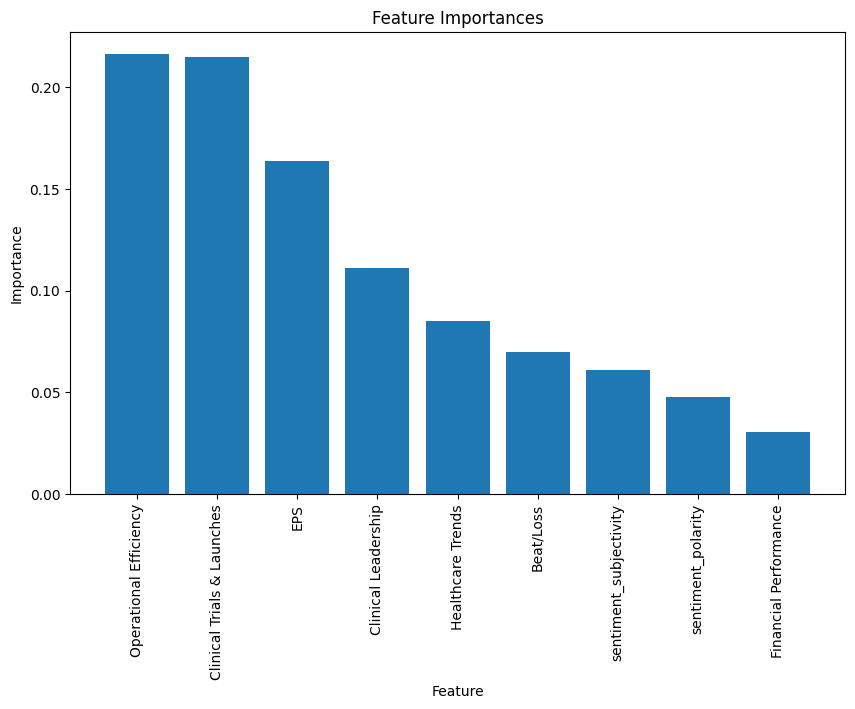

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Getting the feature importances
importances = rf_model.feature_importances_

# Sorting the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Visualizing the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Summary of model results:

The Random Forest Classifier model shows moderate success in predicting stock price direction, with an accuracy of 62%. Precision scores indicate that it correctly identifies stock price decreases 67% of the time and price increases 60% of the time. The recall rates show it captures 50% of actual decreases and 75% of actual increases. Overall, with F1-scores of 57% for decreases and 67% for increases, the model demonstrates a balanced performance in identifying both positive and negative price movements.

# Lasso Model

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
X=tfidf_df.drop("Label", axis=1)
y =df["Percentage Change"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)

# Predict on test set
y_pred = lasso_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Lasso Regression):", mse)

Mean Squared Error (Lasso Regression): 0.0002561798865877712


# Summary of model results:

The Mean Squared Error (MSE) for Lasso Regression is 0.0002561798865877712.  In the context of predicting stock price direction, this means that the average squared difference between the actual stock prices and the predicted stock prices by the Ridge Regression model is approximately 0.0002793. A lower MSE generally indicates that the model's predictions are closer to the actual values, but because the inputs of the model are all very close to 0, and there are a lot of features, it makes sense that the MSE is very low, making the number potentially misleading.

# Ridge Model

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

X=tfidf_df.drop("Label", axis=1)
y =df["Percentage Change"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predict on test set
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Ridge Regression):", mse)

Mean Squared Error (Ridge Regression): 0.0002793037861631432


# Summary of model results

The Mean Squared Error (MSE) for Ridge Regression is 0.0002793037861631432. In the context of predicting stock price direction, this means that the average squared difference between the actual stock prices and the predicted stock prices by the Ridge Regression model is approximately 0.0002793. A lower MSE generally indicates that the model's predictions are closer to the actual values, but because the inputs of the model are all very close to 0, and there are a lot of features, it makes sense that the MSE is very low, making the number potentially misleading.

# SVM Model

In [ ]:
#SVM
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

X=tfidf_df.drop("Label", axis=1)
y =tfidf_df["Label"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(C=1.0, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predict the labels for test set
y_pred = svm_classifier.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred, average='binary')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.4166666666666667
F1 Score: 0.5882352941176471


# Summary of model results:

The Support Vector Machine (SVM) model achieved an accuracy of 41.67% and an F1 score of 0.59 in predicting stock direction. While the accuracy indicates that the model's predictions are correct about 41.67% of the time, the F1 score, which considers both precision and recall, emphasizes that the model's ability to correctly classify positive instances (direction of the stock) is around 59%. Therefore, the SVM model's performance suggests moderate success in predicting stock direction, with room for improvement.

# Autogluon Model

In [ ]:
!pip install autogluon

In [ ]:
import autogluon
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
X=tfidf_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
time_limit = 100  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)
metric = 'roc_auc'  # specify your evaluation metric here
label = 'Label'
predictor = TabularPredictor(label, eval_metric=metric).fit(X_train, time_limit=time_limit, presets='medium_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240319_231400"
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 100s
AutoGluon will save models to "AutogluonModels/ag-20240319_231400"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Nov 18 15:31:17 UTC 2023
CPU Count:          2
Memory Avail:       10.69 GB / 12.67 GB (84.4%)
Disk Space Avail:   72.27 GB / 107.72 GB (67.1%)
Train Data Rows:    26
Train Data Columns: 2467
Label Column:       Label
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Prob

In [ ]:
predictor.leaderboard(X_test)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,0.657143,0.2500,roc_auc,0.014180,0.023451,1.882636,0.014180,0.023451,1.882636,1,True,2
1,KNeighborsUnif,0.628571,0.5000,roc_auc,0.014283,0.191435,2.190238,0.014283,0.191435,2.190238,1,True,1
2,RandomForestEntr,0.628571,0.4375,roc_auc,0.084059,0.073338,5.614605,0.084059,0.073338,5.614605,1,True,6
3,CatBoost,0.628571,0.5000,roc_auc,0.138342,0.429492,23.612495,0.138342,0.429492,23.612495,1,True,7
4,RandomForestGini,0.600000,0.3750,roc_auc,0.074069,0.123730,4.258354,0.074069,0.123730,4.258354,1,True,5
5,NeuralNetTorch,0.571429,0.7500,roc_auc,1.018878,1.611469,4.118959,1.018878,1.611469,4.118959,1,True,12
6,WeightedEnsemble_L2,0.571429,0.7500,roc_auc,1.026479,1.612053,4.563782,0.007602,0.000583,0.444823,2,True,14
7,ExtraTreesEntr,0.514286,0.5000,roc_auc,0.055079,0.060182,1.733299,0.055079,0.060182,1.733299,1,True,9
8,LightGBMXT,0.500000,0.5000,roc_auc,0.014911,0.015850,5.261214,0.014911,0.015850,5.261214,1,True,3
9,LightGBM,0.500000,0.5000,roc_auc,0.018132,0.015488,1.843626,0.018132,0.015488,1.843626,1,True,4


# Summary of model results:

The model evaluation results show that the top-performing model based on the validation score (0.7500) is the Weighted Ensemble model (stack level 2), achieving a test score of 0.5714 with an evaluation metric of ROC AUC. This model has relatively low prediction times and a reasonable fit time. Other notable models include CatBoost and KNeighborsUnif, both with validation scores of 0.5000, and RandomForestEntr with a validation score of 0.4375. These models exhibit varying levels of prediction and fit times. Conversely, XGBoost and LightGBMLarge have the lowest scores across both test and validation sets, indicating poorer performance compared to other models in the evaluation.

# Conclusion/key takeaways

The project provides fascinating insights into the predictive power of textual data extracted from healthcare sector earnings call transcripts. By employing natural language processing techniques to convert complex financial jargon and nuanced speech into structured data, the project was able to capture influential factors that may not be immediately apparent from quantitative data alone.

One of the approaches in this project was the use of topic modeling, specifically Latent Dirichlet Allocation (LDA), which identified prevalent topics within the earnings calls. This unsupervised learning technique was crucial for understanding the thematic structures influencing investor sentiment and stock price movement, such as discussions on operational efficiency or clinical trial outcomes.

Complementing the LDA's insights, various predictive models were trained and evaluated. The Random Forest model, a robust ensemble learning method capable of handling the high dimensionality of text data, showed potential despite its modest accuracy. Its ability to break down the decision-making process into an ensemble of decision trees made it a valuable asset for feature importance analysis, though its precision was somewhat limited.

To refine the performance of the models, including Random Forest and logistic regression, GridSearchCV was utilized to methodically search for the best hyperparameters. This cross-validation tool helped in systematically exploring a wide range of combinations and brought to light the best-performing models based on the given evaluation metrics.

Furthermore, the project's results emphasize the power of ensemble learning. The AutoGluon framework's Weighted Ensemble model achieved a higher validation score than individual models, which indicates that the combination of different models can capture various aspects of the data that single models might miss. The ensemble method effectively consolidates predictions, smoothing out the biases and variances of individual models, thus providing a more balanced and generalizable prediction.

Interestingly, logistic regression, a more traditional statistical model often used for binary classification, was applied to this text data. Its interpretability was a key advantage, allowing for a clear understanding of the relationship between features like 'EPS' or 'Financial Performance' and stock price predictions. The logistic regression model's parameters were carefully tuned to enhance its predictive accuracy.

The insights from text data, when combined with traditional financial metrics, provided a comprehensive view of the underlying patterns and trends that could influence stock prices post-earnings calls. The integration of text analysis with machine learning models underscores the value of blending quantitative and qualitative analyses to form a holistic view of the financial market's behavior, particularly in a sector as dynamic as healthcare.


